In [3]:
# plotting a time series of the indoor mixing (time on the x-axis and indoor mxing on the yaxis) in different locations
# try doing that for a few counties
# tell pandas that the date column is a date. Otherwise, it won't know that and won't do your x-axis properly. You can do that using the pandas.to_datetime function

In [1]:
from urllib.request import urlopen
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#load dataframe here (call it df)
#datafram contains date, county, and indoor activity metric
df = pd.read_csv("https://media.githubusercontent.com/media/bansallab/indoor_outdoor/main/indoor_activity_data/indoor_activity_2018_2020.csv?_sm_au_=iVV404tMNLPkLDTRpGsWvKttvN1NG")

In [3]:
df

,date,county,indoor_activity
0,2018-01-07,1001,1.228336
1,2018-01-14,1001,1.230201
2,2018-01-21,1001,1.103930
3,2018-01-28,1001,1.148204
4,2018-02-04,1001,1.009897
...,...,...,...
490303,2020-11-29,56045,1.220442
490304,2020-12-06,56045,1.206900
490305,2020-12-13,56045,1.179482
490306,2020-12-20,56045,0.964161


In [4]:
# Load geojson data with FIPS codes for county
#I think this is data for the county location/geographical data?
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
    
# Make sure county column is in the right format
# You might need to change the dataframe or column name here if your county column is not called 'county' or your dataframe is not called df
#changing data to the right type
#df.county = df.county.astype(float).astype(int).astype(str).str.zfill(5)

In [5]:
df

,date,county,indoor_activity
0,2018-01-07,1001,1.228336
1,2018-01-14,1001,1.230201
2,2018-01-21,1001,1.103930
3,2018-01-28,1001,1.148204
4,2018-02-04,1001,1.009897
...,...,...,...
490303,2020-11-29,56045,1.220442
490304,2020-12-06,56045,1.206900
490305,2020-12-13,56045,1.179482
490306,2020-12-20,56045,0.964161


In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490308 entries, 0 to 490307
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             490308 non-null  datetime64[ns]
 1   county           490308 non-null  int64         
 2   indoor_activity  490308 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 11.2 MB


In [8]:
df["county"]

0          1001
1          1001
2          1001
3          1001
4          1001
          ...  
490303    56045
490304    56045
490305    56045
490306    56045
490307    56045
Name: county, Length: 490308, dtype: int64

In [8]:
df.loc[df["county"] == 56045]

,date,county,indoor_activity
490152,2018-01-07,56045,1.249710
490153,2018-01-14,56045,1.220420
490154,2018-01-21,56045,1.112256
490155,2018-01-28,56045,1.304747
490156,2018-02-04,56045,1.275519
...,...,...,...
490303,2020-11-29,56045,1.220442
490304,2020-12-06,56045,1.206900
490305,2020-12-13,56045,1.179482
490306,2020-12-20,56045,0.964161


In [9]:
df_montcounty = df.loc[df["county"] == 24031]
df_fredcounty = df.loc[df["county"] == 24021]
df_baltcounty = df.loc[df["county"] == 24510]

In [59]:
df_montcounty

,date,county,indoor_activity
188292,2018-01-07,24031,1.184494
188293,2018-01-14,24031,1.150589
188294,2018-01-21,24031,1.217637
188295,2018-01-28,24031,1.151259
188296,2018-02-04,24031,1.186860
...,...,...,...
188443,2020-11-29,24031,1.132044
188444,2020-12-06,24031,1.057992
188445,2020-12-13,24031,1.182672
188446,2020-12-20,24031,1.083518


<Axes: title={'center': 'Indoor Activity Seasonality Plot'}, xlabel='Date', ylabel='Indoor Ac'>

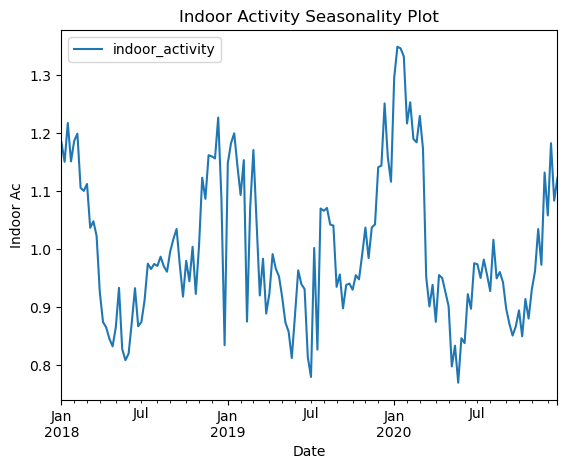

In [10]:
df_montcounty.plot("date","indoor_activity", title = "Indoor Activity Seasonality Plot", xlabel = "Date", ylabel = "Indoor Ac")

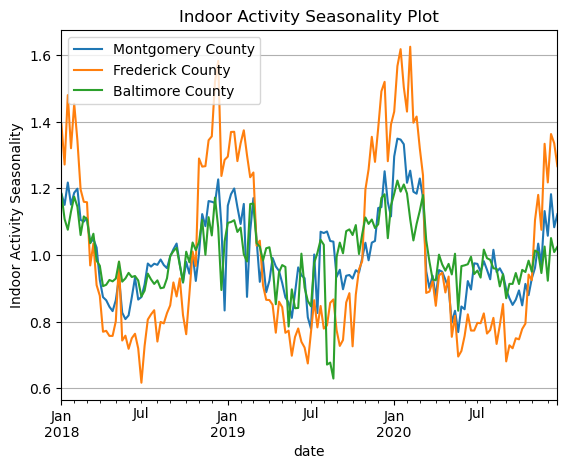

In [11]:
import matplotlib.pyplot as plt
ax = plt.gca()
df_montcounty.plot("date","indoor_activity", label = "Montgomery County", ax = ax,
                   title = "Indoor Activity Seasonality Plot", xlabel = "Date", ylabel = "Indoor Activity Seasonality")
df_fredcounty.plot("date","indoor_activity", label = "Frederick County",  ax = ax)
df_baltcounty.plot("date","indoor_activity", label = "Baltimore County",  ax = ax)
ax.grid('on', which='major', axis='y' )

In [12]:
df_kingCounty = df.loc[df["county"] == 48269]
df_suffolkCounty = df.loc[df["county"] == 51800]
df_cookCounty = df.loc[df["county"] == 13075]
df_MaricopaCounty = df.loc[df["county"] == 4013]

In [13]:
df_MaricopaCounty

,date,county,indoor_activity
16068,2018-01-07,4013,0.969441
16069,2018-01-14,4013,0.962012
16070,2018-01-21,4013,0.972689
16071,2018-01-28,4013,0.851638
16072,2018-02-04,4013,0.934589
...,...,...,...
16219,2020-11-29,4013,0.866033
16220,2020-12-06,4013,1.088540
16221,2020-12-13,4013,1.093274
16222,2020-12-20,4013,0.990562


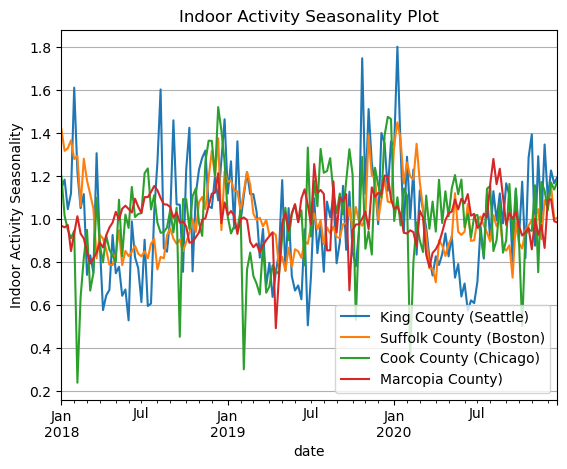

In [14]:
ax = plt.gca()
df_kingCounty.plot("date","indoor_activity", label = "King County (Seattle)", ax = ax,
                   title = "Indoor Activity Seasonality Plot", xlabel = "Date", ylabel = "Indoor Activity Seasonality")
df_suffolkCounty.plot("date","indoor_activity", label = "Suffolk County (Boston)",  ax = ax)
#check fips code for cook county (miami?)
df_cookCounty.plot("date","indoor_activity", label = "Cook County (Chicago)",  ax = ax)
df_MaricopaCounty.plot("date","indoor_activity", label = "Marcopia County)",  ax = ax)
ax.grid('on', which='major', axis='y' )
#use alpha for transparency


In [15]:
#Fig 3 is similar but instead of plotting multiple locations on the same plot, you are plotting multiple years of indoor mixing data for the same location on the same plot.
df_montcounty

,date,county,indoor_activity
188292,2018-01-07,24031,1.184494
188293,2018-01-14,24031,1.150589
188294,2018-01-21,24031,1.217637
188295,2018-01-28,24031,1.151259
188296,2018-02-04,24031,1.186860
...,...,...,...
188443,2020-11-29,24031,1.132044
188444,2020-12-06,24031,1.057992
188445,2020-12-13,24031,1.182672
188446,2020-12-20,24031,1.083518


In [16]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df

,date,county,indoor_activity,year,month,day
0,2018-01-07,1001,1.228336,2018,1,7
1,2018-01-14,1001,1.230201,2018,1,14
2,2018-01-21,1001,1.103930,2018,1,21
3,2018-01-28,1001,1.148204,2018,1,28
4,2018-02-04,1001,1.009897,2018,2,4
...,...,...,...,...,...,...
490303,2020-11-29,56045,1.220442,2020,11,29
490304,2020-12-06,56045,1.206900,2020,12,6
490305,2020-12-13,56045,1.179482,2020,12,13
490306,2020-12-20,56045,0.964161,2020,12,20


In [17]:
df_montcounty = df.loc[df["county"] == 24031]
df_montcounty

,date,county,indoor_activity,year,month,day
188292,2018-01-07,24031,1.184494,2018,1,7
188293,2018-01-14,24031,1.150589,2018,1,14
188294,2018-01-21,24031,1.217637,2018,1,21
188295,2018-01-28,24031,1.151259,2018,1,28
188296,2018-02-04,24031,1.186860,2018,2,4
...,...,...,...,...,...,...
188443,2020-11-29,24031,1.132044,2020,11,29
188444,2020-12-06,24031,1.057992,2020,12,6
188445,2020-12-13,24031,1.182672,2020,12,13
188446,2020-12-20,24031,1.083518,2020,12,20


In [18]:
df_montcounty_2018 = df_montcounty.loc[df["year"] == 2018]
df_montcounty_2019 = df_montcounty.loc[df["year"] == 2019]
df_montcounty_2020 = df_montcounty.loc[df["year"] == 2020]

In [19]:
df_montcounty_2018['date'] = df_montcounty_2018['date'].dt.strftime('%m-%d')
df_montcounty_2019['date'] = df_montcounty_2019['date'].dt.strftime('%m-%d')
df_montcounty_2020['date'] = df_montcounty_2020['date'].dt.strftime('%m-%d')


C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\1506715519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_montcounty_2018['date'] = df_montcounty_2018['date'].dt.strftime('%m-%d')
C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\1506715519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_montcounty_2019['date'] = df_montcounty_2019['date'].dt.strftime('%m-%d')
C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\1506715519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

<Axes: title={'center': 'Indoor Activity Seasonality Plot for Montgomery County'}, xlabel='Date', ylabel='Indoor Activity'>

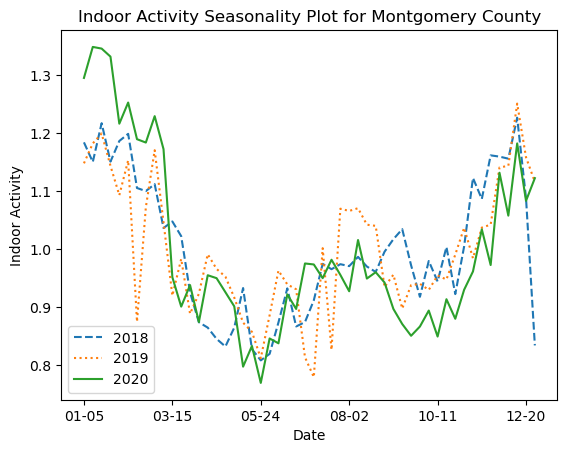

In [20]:
ax = plt.gca()
df_montcounty_2018.plot("date","indoor_activity", 
                   title = "Indoor Activity Seasonality Plot for Montgomery County", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2018", linestyle='dashed')
df_montcounty_2019.plot("date","indoor_activity", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2019", linestyle='dotted')
df_montcounty_2020.plot("date","indoor_activity", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2020")

In [21]:
#Maricopa, Baltimore, Travis, Charleston
df_MaricopaCounty = df.loc[df["county"] == 4013]

df_MaricopaCounty_2018 = df_MaricopaCounty.loc[df["year"] == 2018]
df_MaricopaCounty_2019 = df_MaricopaCounty.loc[df["year"] == 2019]
df_MaricopaCounty_2020 = df_MaricopaCounty.loc[df["year"] == 2020]

df_MaricopaCounty_2018['date'] = df_MaricopaCounty_2018['date'].dt.strftime('%m-%d')
df_MaricopaCounty_2019['date'] = df_MaricopaCounty_2019['date'].dt.strftime('%m-%d')
df_MaricopaCounty_2020['date'] = df_MaricopaCounty_2020['date'].dt.strftime('%m-%d')


C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\124572954.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MaricopaCounty_2018['date'] = df_MaricopaCounty_2018['date'].dt.strftime('%m-%d')
C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\124572954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MaricopaCounty_2019['date'] = df_MaricopaCounty_2019['date'].dt.strftime('%m-%d')
C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\124572954.py:10: SettingWithCopyWarning: 
A value is trying to

In [22]:
df_MaricopaCounty

,date,county,indoor_activity,year,month,day
16068,2018-01-07,4013,0.969441,2018,1,7
16069,2018-01-14,4013,0.962012,2018,1,14
16070,2018-01-21,4013,0.972689,2018,1,21
16071,2018-01-28,4013,0.851638,2018,1,28
16072,2018-02-04,4013,0.934589,2018,2,4
...,...,...,...,...,...,...
16219,2020-11-29,4013,0.866033,2020,11,29
16220,2020-12-06,4013,1.088540,2020,12,6
16221,2020-12-13,4013,1.093274,2020,12,13
16222,2020-12-20,4013,0.990562,2020,12,20


<Axes: title={'center': 'Indoor Activity Seasonality Plot for Maricopa County (Arizona)'}, xlabel='Date', ylabel='Indoor Activity'>

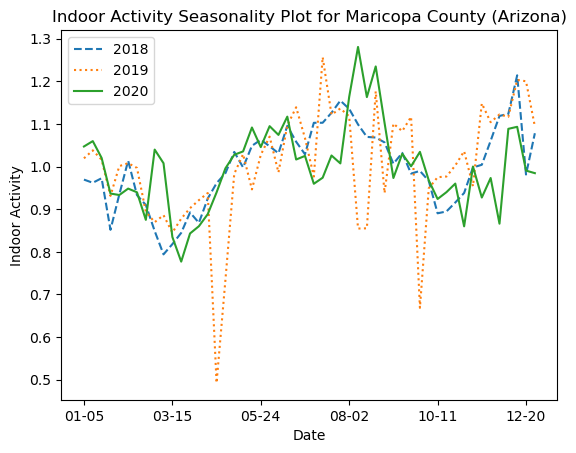

In [23]:
ax = plt.gca()
df_MaricopaCounty_2018.plot("date","indoor_activity", 
                   title = "Indoor Activity Seasonality Plot for Maricopa County (Arizona)", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2018", linestyle='dashed')
df_MaricopaCounty_2019.plot("date","indoor_activity", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2019", linestyle='dotted')
df_MaricopaCounty_2020.plot("date","indoor_activity", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2020")

In [24]:
#Maricopa, Baltimore, Travis, Charleston
df_baltcounty = df.loc[df["county"] == 24510]

df_baltcounty_2018 = df_baltcounty.loc[df["year"] == 2018]
df_baltcounty_2019 = df_baltcounty.loc[df["year"] == 2019]
df_baltcounty_2020 = df_baltcounty.loc[df["year"] == 2020]

df_baltcounty_2018['date'] = df_baltcounty_2018['date'].dt.strftime('%m-%d')
df_baltcounty_2019['date'] = df_baltcounty_2019['date'].dt.strftime('%m-%d')
df_baltcounty_2020['date'] = df_baltcounty_2020['date'].dt.strftime('%m-%d')

C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\2719910365.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baltcounty_2018['date'] = df_baltcounty_2018['date'].dt.strftime('%m-%d')
C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\2719910365.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baltcounty_2019['date'] = df_baltcounty_2019['date'].dt.strftime('%m-%d')
C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\2719910365.py:10: SettingWithCopyWarning: 
A value is trying to be set on a 

<Axes: title={'center': 'Indoor Activity Seasonality Plot for Baltimore County (Maryland)'}, xlabel='Date', ylabel='Indoor Activity'>

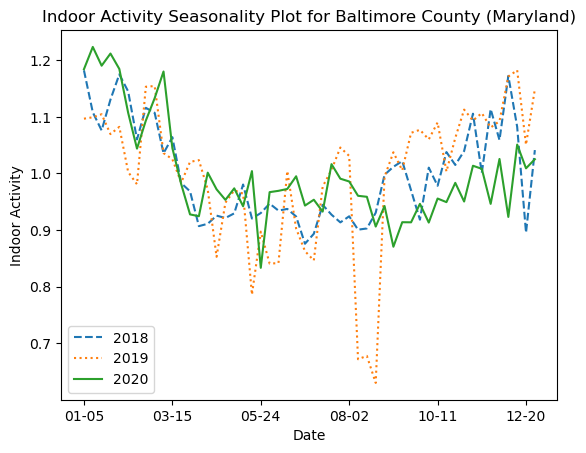

In [25]:
ax = plt.gca()
df_baltcounty_2018.plot("date","indoor_activity", 
                   title = "Indoor Activity Seasonality Plot for Baltimore County (Maryland)", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2018", linestyle='dashed')
df_baltcounty_2019.plot("date","indoor_activity", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2019", linestyle='dotted')
df_baltcounty_2020.plot("date","indoor_activity", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2020")

C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\2693873496.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charlestonCounty_2018['date'] = df_charlestonCounty_2018['date'].dt.strftime('%m-%d')
C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\2693873496.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charlestonCounty_2019['date'] = df_charlestonCounty_2019['date'].dt.strftime('%m-%d')
C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\2693873496.py:9: SettingWithCopyWarning: 
A value is

<Axes: title={'center': 'Indoor Activity Seasonality Plot for Charleston County (South Carolina)'}, xlabel='Date', ylabel='Indoor Activity'>

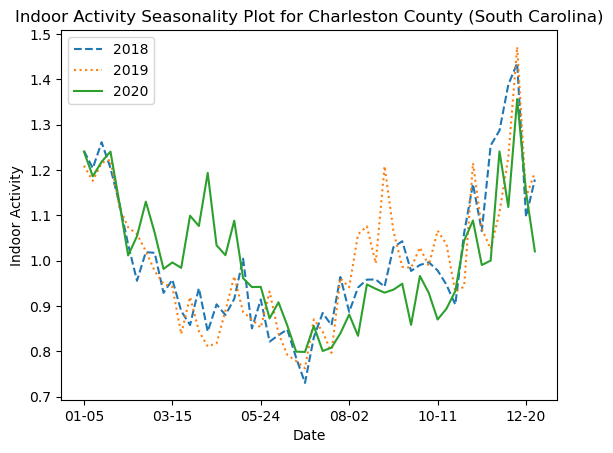

In [26]:
df_charlestonCounty = df.loc[df["county"] == 45019]

df_charlestonCounty_2018 = df_charlestonCounty.loc[df["year"] == 2018]
df_charlestonCounty_2019 = df_charlestonCounty.loc[df["year"] == 2019]
df_charlestonCounty_2020 = df_charlestonCounty.loc[df["year"] == 2020]

df_charlestonCounty_2018['date'] = df_charlestonCounty_2018['date'].dt.strftime('%m-%d')
df_charlestonCounty_2019['date'] = df_charlestonCounty_2019['date'].dt.strftime('%m-%d')
df_charlestonCounty_2020['date'] = df_charlestonCounty_2020['date'].dt.strftime('%m-%d')

ax = plt.gca()
df_charlestonCounty_2018.plot("date","indoor_activity", 
                   title = "Indoor Activity Seasonality Plot for Charleston County (South Carolina)", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2018", linestyle='dashed')
df_charlestonCounty_2019.plot("date","indoor_activity", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2019", linestyle='dotted')
df_charlestonCounty_2020.plot("date","indoor_activity", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2020")

C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\3187219097.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_travisCounty_2018['date'] = df_travisCounty_2018['date'].dt.strftime('%m-%d')
C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\3187219097.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_travisCounty_2019['date'] = df_travisCounty_2019['date'].dt.strftime('%m-%d')
C:\Users\kbgs573\AppData\Local\Temp\ipykernel_21072\3187219097.py:9: SettingWithCopyWarning: 
A value is trying to be se

<Axes: title={'center': 'Indoor Activity Seasonality Plot for Travis County (Texas)'}, xlabel='Date', ylabel='Indoor Activity'>

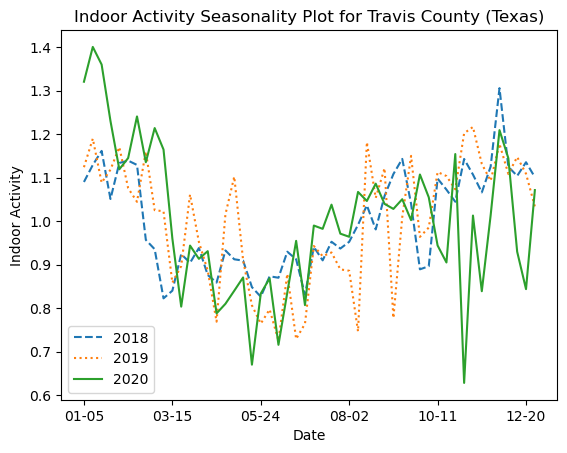

In [27]:
df_travisCounty = df.loc[df["county"] == 48453]

df_travisCounty_2018 = df_travisCounty.loc[df["year"] == 2018]
df_travisCounty_2019 = df_travisCounty.loc[df["year"] == 2019]
df_travisCounty_2020 = df_travisCounty.loc[df["year"] == 2020]

df_travisCounty_2018['date'] = df_travisCounty_2018['date'].dt.strftime('%m-%d')
df_travisCounty_2019['date'] = df_travisCounty_2019['date'].dt.strftime('%m-%d')
df_travisCounty_2020['date'] = df_travisCounty_2020['date'].dt.strftime('%m-%d')

ax = plt.gca()
df_travisCounty_2018.plot("date","indoor_activity", 
                   title = "Indoor Activity Seasonality Plot for Travis County (Texas)", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2018", linestyle='dashed')
df_travisCounty_2019.plot("date","indoor_activity", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2019", linestyle='dotted')
df_travisCounty_2020.plot("date","indoor_activity", xlabel = "Date", ylabel = "Indoor Activity", ax = ax,
                       label = "2020")

In [ ]:
#plotting time series for locations for 2018 and 2019
#seaborn for visualizations
#function called heatmap
#each row is a county's time series
# there is an order in how each county is selected (by latitude)
